In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic Regression

Classification is the task of assigning a class label to data point. Assume we have a set of images containing Cats and Dogs. Given an image we need to say if it contains a Dog or Cat. This is the task of Classification. Other examples of Classification include 
* Classification of Tumors as Benign or Malignant
* Classification fo Movies into Action, Adventure and Romance,etc <br>


For the following tutorial lets have the following assumptions. For the sake of simplicity we assume only two classes to be present. So lets get started. First the inputs are multiplied by a weights matrix to get a scalar output. The resulting scalar output is sent to a sigmoid function to get a value between 0 and 1. <br><br>

We assume the output to be the Probability of the Data Point belonging to Class 1

# Sigmoid Function

This is the equation of Sigmoid Function
<p align="left">$$F(X) = \frac{1}{1 + e^{-X}}$$</p>

In [34]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

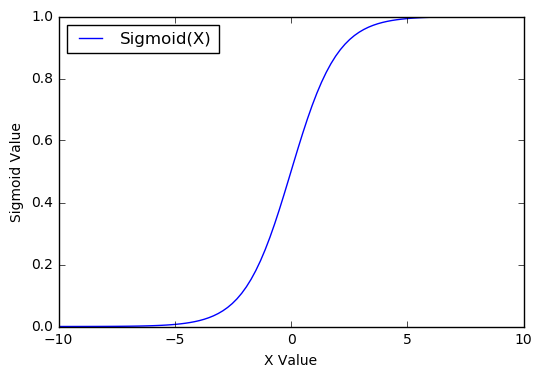

In [35]:
plt.figure()
x = np.linspace(-10,10,100)
plt.plot(x,sigmoid(x),label="Sigmoid(X)")
plt.xlabel("X Value")
plt.ylabel("Sigmoid Value")
plt.legend(loc=2)
plt.show()

Let's assume that Sigmoid Function outputs a probability of belonging to Class 1. So if the input value to this function is more and more positive, then it belongs to positive class. Else, it belongs to negative class. That's it for Sigmoid Function

# Weights Multiplication

We have an Weight matrix, which is going to be multiplied by the input. Let's call this process as Linear Multiplication. 

In [36]:
def lin_mul(x,weights):
    return np.dot(x,weights)

The Multiplied  value if sent to the Sigmoid function, for computing the probability of it belonging to Class 1

# Cost Function

Okay! Now we have a Prediction. How right are we? How wrong are we? For this purpose, we are going to need a Cost Function. Lesser Cost implied better prediction. More cost implies worse prediction


Since the Function outputs probability of a data point belonging to a positive class, the cost function is going to depend on the output Probability. We are going to come across four cases
* Positive Class Predicted as Positive (High Sigmoid Value) (Low Cost)
* Negative Class Predicted as Negative (Low Sigmoid Value) (Low Cost)
* Positive Class Predicted as Negative (Low Sigmoid Value) (High Cost)
* Negative Class Predicted as Positive (High Sigmoid Value) (High Cost)



$$Cost(y,\hat{y}))\hspace{5pt}  = -log(\hat{y}) \hspace{5pt}(if\hspace{5pt} y=1) $$
$$Cost(y,\hat{y}))\hspace{5pt}  = -log(1 - \hat{y}) \hspace{5pt}(if\hspace{5pt} y=0) $$


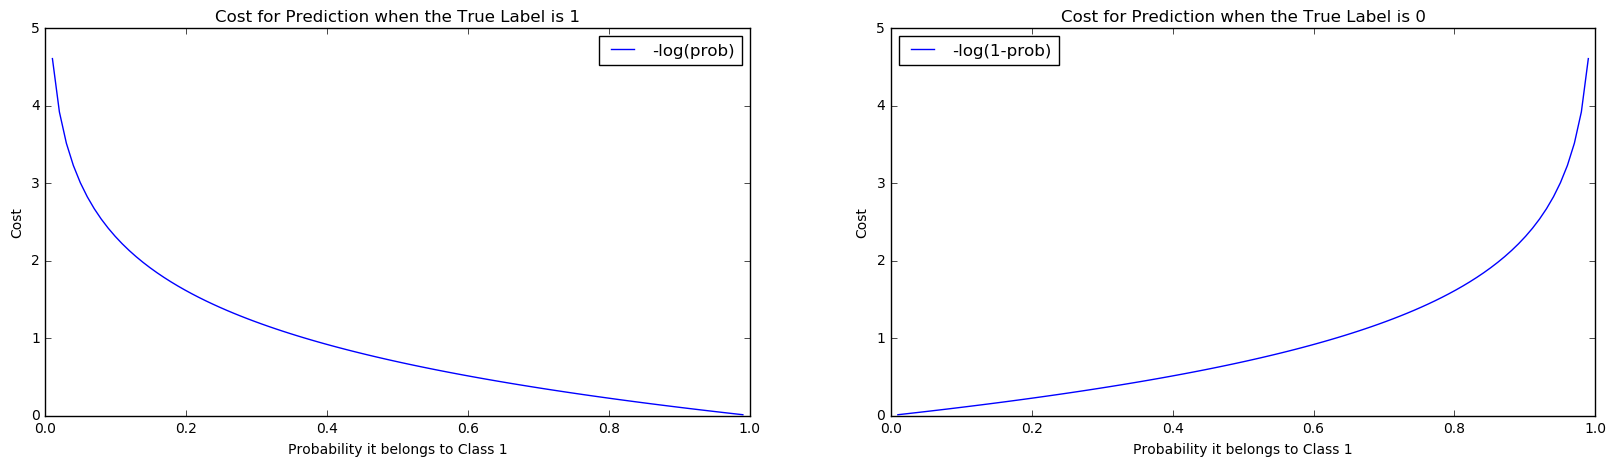

In [37]:
plt.close("all")
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
prob = np.linspace(0.01,.99,100)
plt.plot(prob,-np.log(prob),label="-log(prob)")
plt.title("Cost for Prediction when the True Label is 1")
plt.xlabel("Probability it belongs to Class 1")
plt.ylabel("Cost")
plt.legend()
plt.subplot(1,2,2)
prob = np.linspace(0.01,.99,100)
plt.plot(prob,-np.log(1-prob),label="-log(1-prob)")
plt.title("Cost for Prediction when the True Label is 0")
plt.xlabel("Probability it belongs to Class 1")
plt.ylabel("Cost")
plt.legend(loc=2)
plt.show()

The Cost is low when the Probable Class is close to its True Labels! <br><br>
It's high when True Label is not close to the Probable Class.

$$Cost(y,\hat{y}))\hspace{5pt}  = -[ylog(\hat{y}) + (1-y)log(1-\hat{y})]  $$



# Creating Logistic Regression using Numpy

In [38]:
def return_data(file_name):
    data = open(file_name).readlines()
    X = []
    y = []
    for i in data:
        X.append(i.lower().split(",")[0])
        y.append(int(i.split(",")[1]))
    
    return X,y


In [39]:
train_x,train_y = return_data('sentences.txt')
test_x,test_y = return_data('test_sentences.txt')

In [40]:
train_x

['you are an idiot',
 'good morning idiot',
 'good morning buddy',
 'good morning stupid',
 'good morning man!',
 'you are amazing!']

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
train_x = vectorizer.fit_transform(train_x).toarray()
test_x = vectorizer.transform(test_x).toarray()

# Parameters 

In [52]:
lr = 0.001
n_epochs = 10000

In [53]:
weights_vector = np.random.random(train_x.shape[1])

In [54]:
def cost_function(pred,truth):
    return -truth*np.log(pred) - (1-truth)*np.log(1-pred)

In [56]:
for ep in range(n_epochs):
    avg_cost = 0
    for i in range(len(train_x)):
        data_point = train_x[i]
        label  = train_y[i]
        pred_prob = sigmoid(lin_mul(weights_vector,data_point))
        avg_cost += cost_function(pred_prob,label)
        weights_vector = weights_vector - lr*(pred_prob - label)* data_point
    if ep%100==0:
        print ("Epoch {} has finished. Error is {}".format(ep+1,avg_cost/4.0))
        

Epoch 1 has finished. Error is 0.124694854482
Epoch 101 has finished. Error is 0.123461798008
Epoch 201 has finished. Error is 0.122251869794
Epoch 301 has finished. Error is 0.121064443352
Epoch 401 has finished. Error is 0.119898914143
Epoch 501 has finished. Error is 0.118754698639
Epoch 601 has finished. Error is 0.117631233436
Epoch 701 has finished. Error is 0.116527974407
Epoch 801 has finished. Error is 0.115444395899
Epoch 901 has finished. Error is 0.114379989965
Epoch 1001 has finished. Error is 0.113334265642
Epoch 1101 has finished. Error is 0.112306748254
Epoch 1201 has finished. Error is 0.111296978753
Epoch 1301 has finished. Error is 0.110304513097
Epoch 1401 has finished. Error is 0.109328921642
Epoch 1501 has finished. Error is 0.108369788581
Epoch 1601 has finished. Error is 0.107426711394
Epoch 1701 has finished. Error is 0.106499300332
Epoch 1801 has finished. Error is 0.105587177924
Epoch 1901 has finished. Error is 0.104689978501
Epoch 2001 has finished. Error i

In [57]:
preds = np.where(sigmoid(lin_mul(test_x,weights_vector))>.5,1,0)
print (preds)

In [58]:
preds

array([1, 1, 0, 1, 0])